
# Projeto Especial - Segmentação de clientes

####    Henry Frederick Ridwan Surjadi, Tiago Sessa Brioschi e Victor Sampaio Monteiro
####    17 de Novembro de 2021


### README
Projeto especial desenvolvido sob orientação do professor Abrantes Araújo Silva Filho como requisito da disciplina Projeto Especial da pós-graduação em Data Science do Centro Universitário FAESA, com o objetivo de identificar uma oportunidade ou problema real e, através do desenvolvimento de um projeto ou produto de dados, propor uma inovação para a oportunidade identificada ou uma solução para o problema encontrado.


### Summary
The steps in a data analysis:
+ [The Question](#the-question)
+ [The Dataset](#the-dataset)
+ [Obtaining the data](#obtaining-the-data)
+ [Cleaning the data](#cleaning-the-data)
+ [Exploratory data analysis](#exploratory-data-analysis)
+ [Statistical prediction or modeling](#statistical-prediction-or-modeling)
+ [Interpretation of results](#interpretation-of-results)
+ [Challenging of results](#challenging-of-results)
+ [Creating reproducible code](#creating-reproducible-code)
+ [Contact info](#contact-info)


### The Question 

Será possível criar um modelo que faça a segmentação dos clientes a partir da análise qualitativa e quantitativa dos dados de um determinado shopping?

Nosso objetivo é: Criar um modelo para realizar a segmentação dos clientes de modo que estratégias específicas possam ser feitas, onde correlacionem seus interesses de cada grupo com os seus respectivos produtos.

### The Dataset

Dados obtidos no site Kaggle que é uma comunidade online de cientistas de dados e praticantes de aprendizagem de máquina que fornece datasets para estudo.

O link do dataset é <https://www.kaggle.com/shwetabh123/mall-customers>

O dataset possui os seguintes dados:
1. **CustomerID**: Id do cliente.
2. **Genre**: Sexo do cliente.
3. **Age**: Idade do cliente.
4. **Annual Income(k$)**: Salário anual do cliente.
5. **Spending Score(1-100)**: Um score dado a um cliente pelas autoridades do shopping baseado na quantidade de dinheiro gasto e no comportamento do cliente.

### Obtaining the data

In [5]:
#   Importação da Biblioteca pandas para a leitura dos dados.
import pandas as pd

#   ---------------------------------- 
#   Criação do dataframe df a partir do arquivo Mall_Customers.csv usando o método read_csv da biblioteca pandas.
#   Coloca-se o index da coluna igual a 0 devido a coluna CustomerID para melhor visualização, mas não é obrigatório.
df = pd.read_csv("Mall_Customers.csv", index_col=0)

#   Verificando a estrutura do dataset.
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


O DataFrame apresenta uma *structure* de 4 variáveis com 200 observações.

São 200 linhas e 5 colunas. 

In [6]:
#   Verificando os tipos dos dados.
df.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#   Verificando o formato das colunas do DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Cleaning the data

In [8]:
#   Verificar se existe Valor Nulo.
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

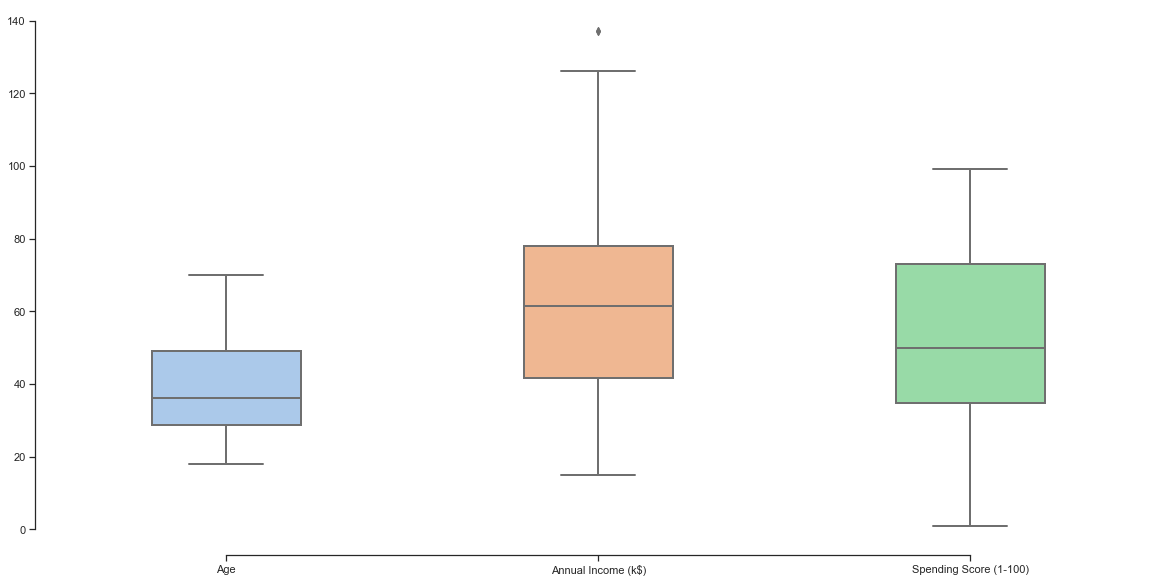

In [47]:
#   Verificando Outliers com Seaborn

#   Importação da Biblioteca Seaborn e Matplotlib para a geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#   Definindo Parâmetros do Gráfico.
#   Tamanho:
plt.figure(figsize =[20,10])
#   Estilo e Cores: 
sns.set_theme(style="ticks", palette="pastel")
#   Populando o Boxplot:
sns.boxplot(data=df, width=0.4, linewidth=2)
sns.despine(trim=True, offset=5)
plt.show()

Observa-se a ocorrência de um Outlier, porém o dado em si, encontra-se na coluna de Salário Anual.
 
Como é um dado único, o mesmo não irá afetar a ánalise dos dados.

### Exploratory Data Analysis

In [11]:
#   Através do método head, faz a leitura das primeiras linhas do DataFrame "df".
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
#   Através do método tail, faz a leitura das ultimas linhas do DataFrame "df".
df.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


In [13]:
#   Entendendo os dados, calculando um resumo das estatisticas do DataFrame.
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Analisando os dados acima, verifica-se a príncipio o seguinte:

+   A média de idade dos clientes é de aproximadamente 39 anos;
+   O salário anual máximo dos clientes é de 137 k$;
+   A média do Score dos clientes é de 50;
+   A idade mínima dos clientes é 18 anos e a máxima é 70;
+   O salário mínimo é 15 k$;
+   A média e a mediana são bem parecidas, sendo respectivamente 60 k$ e 61 k$.

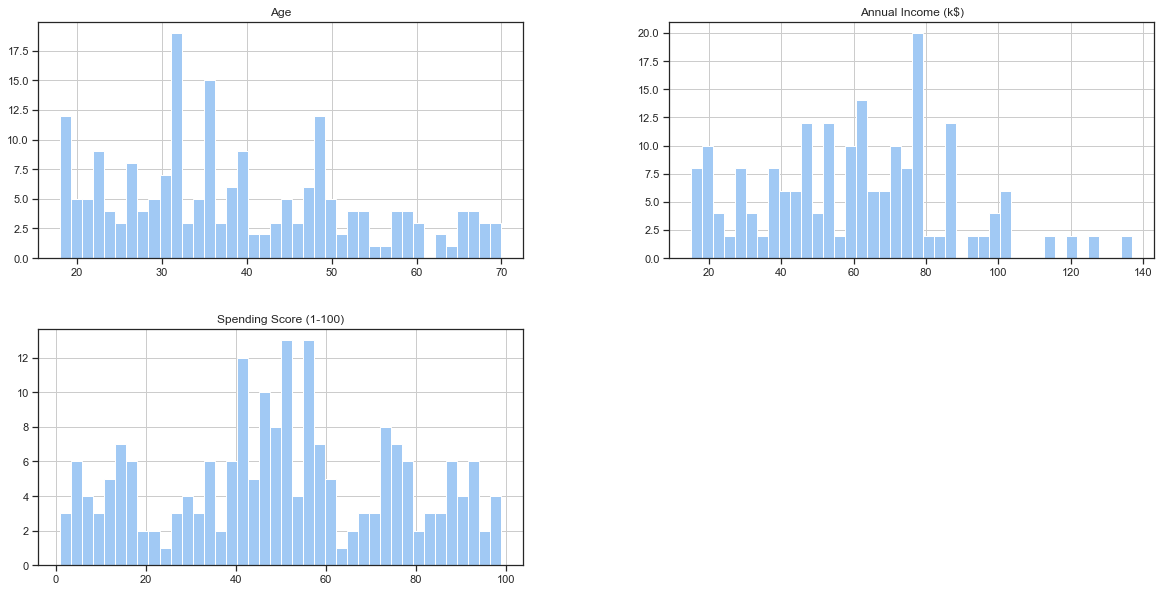

In [14]:
#   Visualização de dados das colunas a partir de histogramas.
df.hist(figsize=(20,10) , bins= 40)
plt.show()

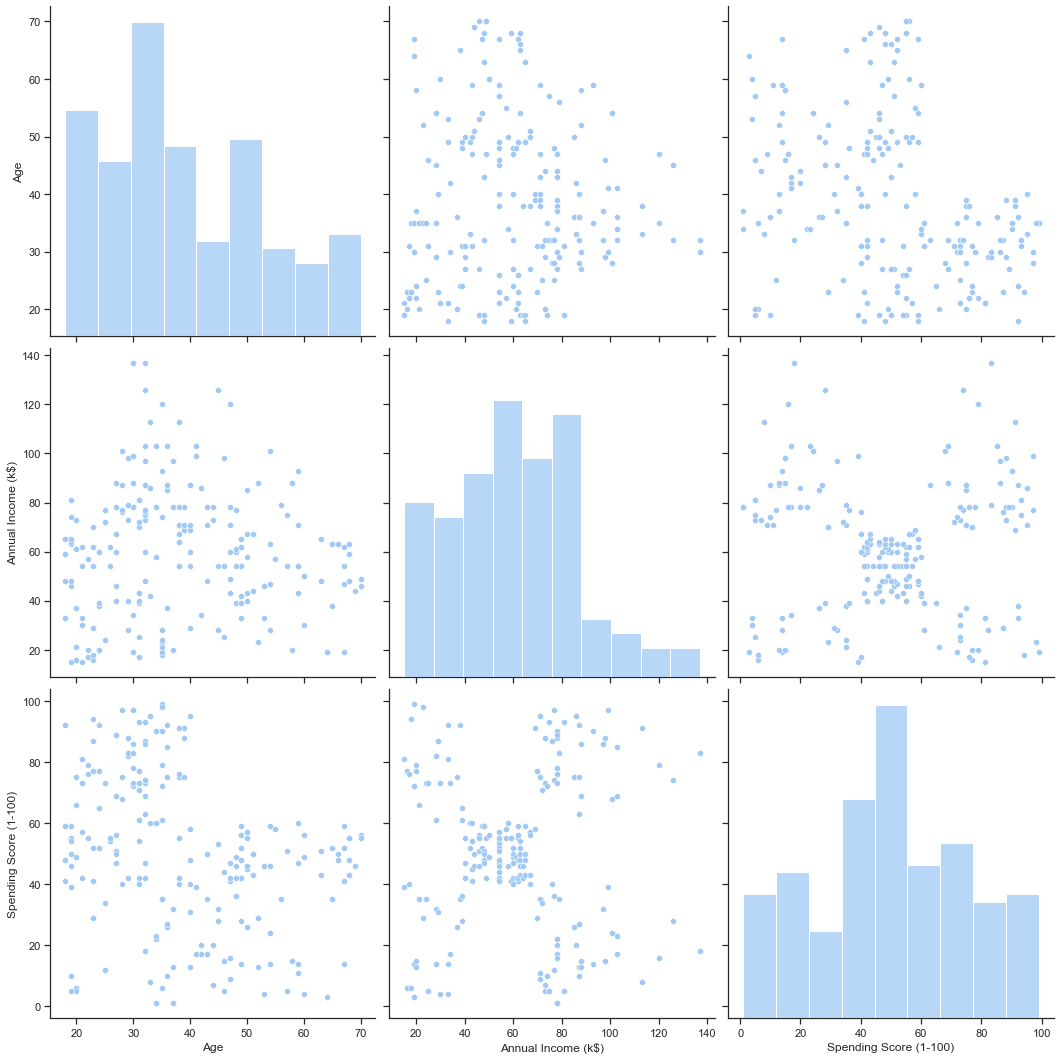

In [15]:
#   Visualização das colunas Age x Annual Income x Spending Score

#   Importando a biblioteca Seaborn
import seaborn as sns
# ---------------------------------------
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], height=5)
plt.show()

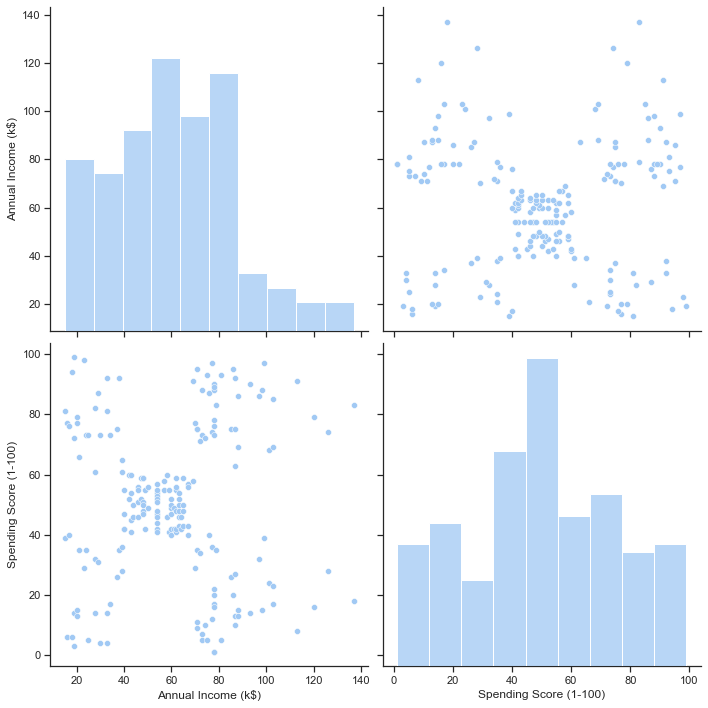

In [16]:
#   Exibindo somente o Pairplot do Annual Income e Spending Score.
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)']], height=5)
plt.show()

Observa-se que o gráfico 'Spending Score' x 'Annual Income (k$)' possui algum padrão, onde observa-se o inicio de uma segmentação e que aparentemente são os melhores fatores / atributos para determinar a segmentação dos clientes.


In [17]:
#   Verificando a correlação entre as variáveis do "df".
#   E criação da variável 'corr' que recebe a correlação.
corr = df.corr()
corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Observa-se que aparentemente não há correlação entre as colunas.

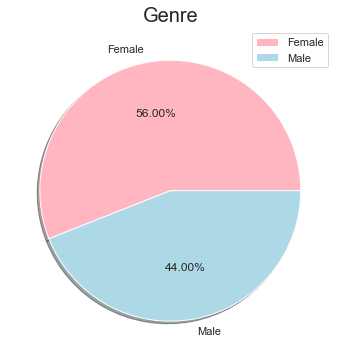

Female    112
Male       88
Name: Genre, dtype: int64

In [48]:
#   Criação da lista 'labels' e da variavel 'valores' que recebe os valores da coluna Genre.
labels = ["Female", "Male"]
valores = df["Genre"].value_counts()

#   Tamanho do gráfico
plt.rcParams['figure.figsize'] = (6,6)

#   Função do gráfico em pizza, que recebe o array 'valores', e a lista 'labels'.
#   Com a configuração de sombra = True para melhor visualização.
#   E com autopct para configuração de porcentagem.
plt.pie(valores, labels=labels, shadow=True, autopct='%.2f%%', colors=["lightpink", "lightblue"])

#   Titulo do Gráfico.
plt.title('Genre', fontsize = 20)

#   Sem legenda no eixo X.
plt.axis('off')

#   legenda do gráfico.
plt.legend()
plt.show()

#   Vericando a quantidade de Homens e Mulheres.
df["Genre"].value_counts()

Observa-se que os dataset possui:
+   112 Mulheres que correspondem a 56% dos dados;
+   88  Homens que correspondem a 44% dos dados.

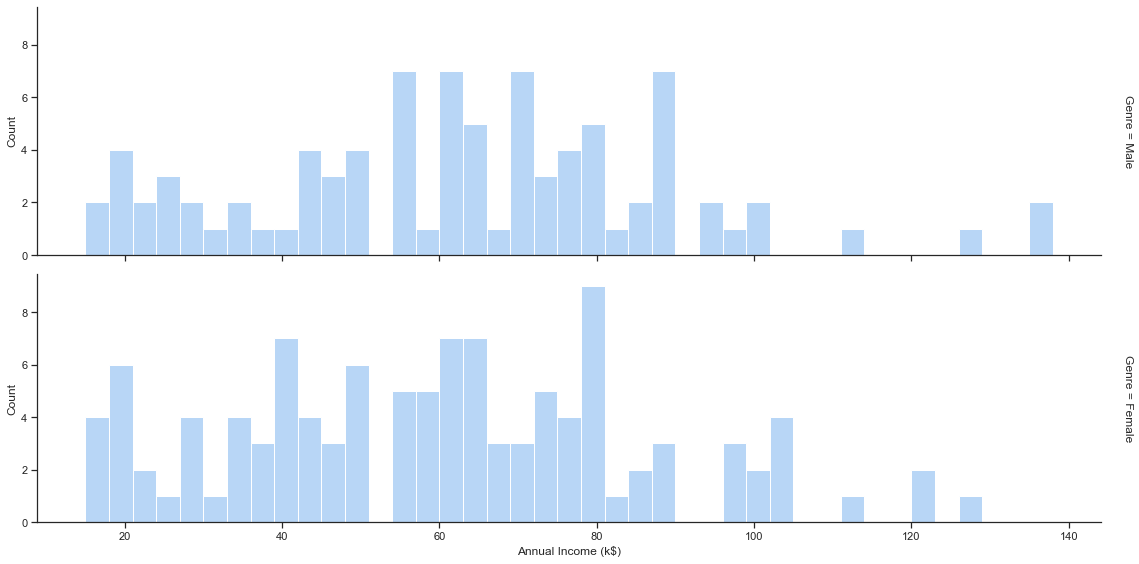

In [50]:
#   Visualização dos salários anuais a partir do gênero.
#   Exibindo gráfico da quantidade de Homens e Mulheres em relaçao aos seus Salários Anuais.
sns.displot(
    df, x="Annual Income (k$)", row="Genre", aspect=4,
    binwidth=3, height=4, facet_kws=dict(margin_titles=True)
)
plt.show()

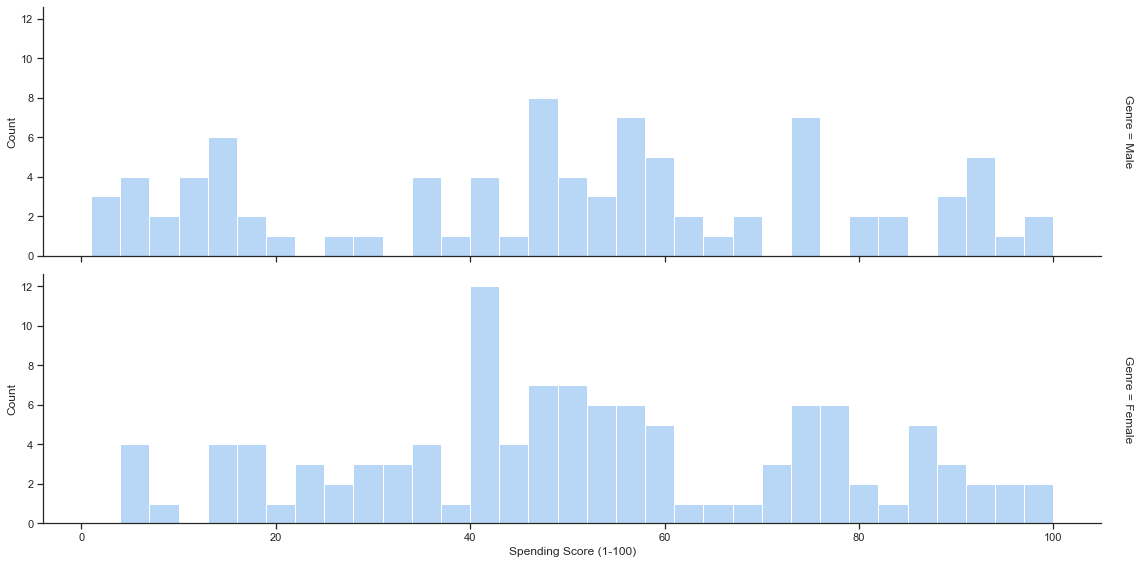

In [53]:
#   Visualização do Pontuação de Gastos a partir do gênero.
sns.displot(
    df, x="Spending Score (1-100)", row="Genre", aspect=4,
    binwidth=3, height=4, facet_kws=dict(margin_titles=True)
)
plt.show()

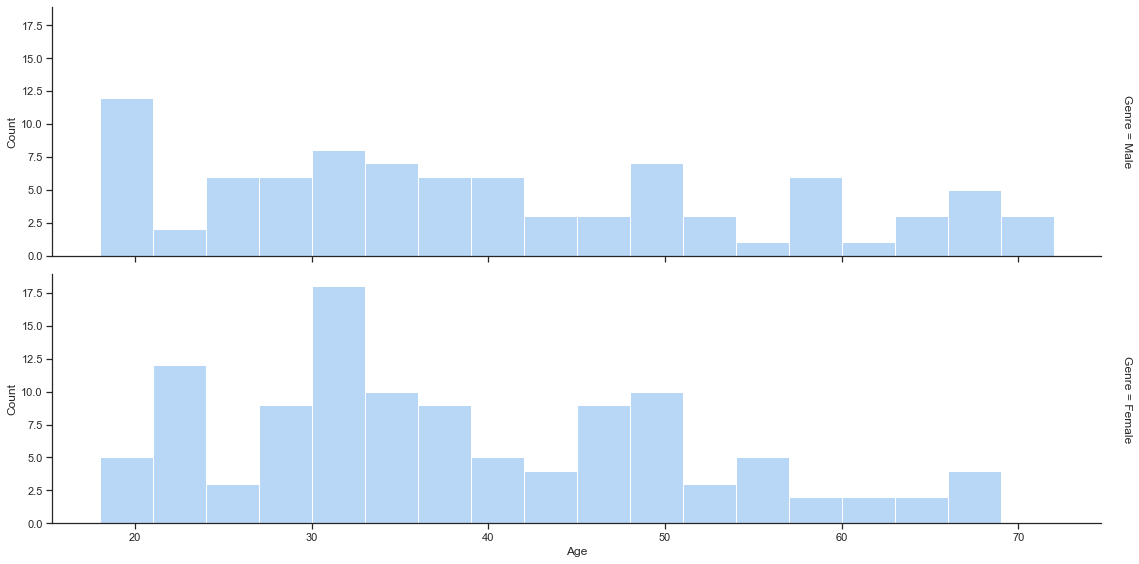

In [52]:
#   Visualização da idade a partir do gênero.
sns.displot(
    df, x="Age", row="Genre", aspect=4,
    binwidth=3, height=4, facet_kws=dict(margin_titles=True)
)
plt.show()

In [25]:
#   Cria o dataframe 'dfmales', usando os dados contidos em df.
#   Usa-se o método str(método string) e dentro dele o método contains para pegar parte da string desejada ("Male").
#   A nível de legibilidade, coloca-se True na validação do retorno do método.
#   mas não é obrigatorio pois o próprio método já retorna True ou False.
dfmales = df[df['Genre'].str.contains("Male") == True]
dfmales.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,88.000000,88.000000,88.000000
mean,39.806818,62.227273,48.511364
std,15.514812,26.638373,27.896770
min,18.000000,15.000000,1.000000
25%,27.750000,45.500000,24.500000
50%,37.000000,62.500000,50.000000
75%,50.500000,78.000000,70.000000
max,70.000000,137.000000,97.000000


In [26]:
#   Cria o dataframe 'dffemales', usando os dados contidos em df.
#   Usa-se o método str(método string) e dentro dele o método contains para pegar parte da string desejada ("Female").
#   A nível de legibilidade, coloca-se True na validação do retorno do método. 
#   Mas não é obrigatorio pois o próprio método já retorna True ou False.
dffemales = df[df['Genre'].str.contains("Female") == True]
dffemales.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,112.000000,112.000000,112.000000
mean,38.098214,59.250000,51.526786
std,12.644095,26.011952,24.114950
min,18.000000,16.000000,5.000000
25%,29.000000,39.750000,35.000000
50%,35.000000,60.000000,50.000000
75%,47.500000,77.250000,73.000000
max,68.000000,126.000000,99.000000


Conforme observado nos dados e gráficos acima, ao explorar os gastos anuais e score dos Homens e das Mulheres, verifica-se que não há uma variação significante em relação ao gênero.

### Statistical prediction or modeling


####    Unsupervised machine learning

Clustering is a technique that partitions the instances in a dataset into groups, or clusters, that are similar to each other.

One of the most common applications of clustering is Customer segmentation with which organizations attempt to discover meaningful groupings into which they can group their customers so that targeted offer or treatments can be designed.



#### K-means clustering

The goal of **k-means clutering** is to take a dataset, *D*, consisting of *n* instances, **d1** to **d2**, where **di** is a set of *m* descriptive features, and divide this dataset into *k* disjoint clusters, *c1* to *ck*. The number of clusters to be found, *k*, is an input to the algorithm and each instance can belong to only one cluster. The algorithm finds the division of instances into clusters by minimizing 

$$ \sum_{i=1}^{n}\min_{c_1,...,c_k} Dist(d_i,c_j) $$
where 

c1 to ck = are the centers of the *k* clusters, referred to as **cluster centroids**;

Dist = is a distance measure used to compare instances to centroids

The algorithm begins by randomly selecting *k* cluster centroids, c1 to ck, where a cluster centroid is composed of a value for each descriptive feature present in a dataset (these initial cluster centroids are often referred to as **seeds**).

The values for these cluster centroids can be selected randomly following uniform distributions bounded by the minimum and maximum values of each feature. The distance of each instance in the dataset to each of these cluster centroids is then calculated using the distance measure *Dist*. It is usual in **k-means clustering** for *Dist* is to calculate **Euclidean distance**.

Each instance in the dataset is then assigned to be a *member* of the cluster, *Ci*, to whose cluster centroid, **c***i*, it is closest.

The cluster centroids are then updated to the average value of the descriptive features of the members of a cluster. In this way the cluster centroids are moved to be representative of the members of that cluster.

This process repeats until convergence occurs - where *convergence* is defined as having occurred when no cluster memberships change on an iteration of the algorithm and therefore the cluster centroids are stable. 

Once the algorithm has completed, its two outputs are a vector of assignments of each instance in the dataset to one of the clusters, *C1* to *Ck*, and the *k* cluster centroids, **c1** to **ck**. This first output can be used to enrich the original dataset with a new generated feature, the cluster memberships. 




####    Resume

1. initial randomly selected cluster centroids based on the seeds.
2. Calculate the Euclidean distance from each instance in the dataset to each cluster centroid.
3. On the basis of these distances, each instance in *D* is assigned to one of these clusters.
4.  Each cluster centroid is then updated by calculating the mean value of each descriptive feature for all instances that are a member of the cluster.
5. The previous process is then repeated, and the distances of each instance in *D* to these updated cluster centrois, until the process is considered to have converged.

Obs: For larger datasets, Usually converges after tens of iterations

####    Good Practices

The choice of these initial seeds can have a big impact on the performance of the algorithm.

Different randomly selected starting points can lead to different, often sub-optimal, clustering.

One way to solve this issue, is to perform multiple runs of the *k-means clustering* algorithm starting from different initial centroids and then aggregate the results. In this way the most common clustering is chosen as the final result. 

Or you can use other methods designed to more carefully select the initial centroids.



In [28]:
#   Criação da variável X(D) que recebe apenas os valores das colunas Annual Income e Spending Score
X = df.iloc[:, [2, 3]].values

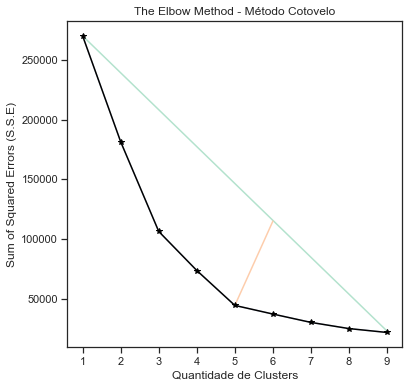

In [29]:
#   Importando a biblioteca Numpy
import numpy as np

#   Importanto o método KMeans da biblioteca scikit learn
from sklearn.cluster import KMeans

#   Criação de uma lista para receber as distorções
distortions = []

#   Criação da variável k que recebe valores de dez clusters
K = range(1, 10)

#   Loop para cálculo do modelo KMeans e suas distorções
for k in K:
    
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++',    random_state = 23)
    #   Treina o modelo Kmeans a partir dos dados de X
    kmeansModel.fit(X)
    #   Adiciona as distorções na lista
    distortions.append(kmeansModel.inertia_)
    
x = [1,9]
y = [270000, 23000]
plt.plot(x, y)
a = [6, 5]
b = [115000, 44448.45544793369]
plt.plot(a,b)

# Chamada de funções da biblioteca matplotlib para melhorar a visualização do gráfico
#   Tamanho do gráfico [Largura, Altura]
plt.rcParams['figure.figsize'] = (15,10)
#   Tamanho da fonte
plt.rc("font", size=15)
#   Dados que serão plotados no gráfico
plt.plot(K, distortions)
#   Titulo do Gráfico
plt.title("The Elbow Method - Método Cotovelo")
#   Legenda do eixo x
plt.xlabel("Quantidade de Clusters")
#   Legenda do Eixo y - Sum of Squared Errors
plt.ylabel("Sum of Squared Errors (S.S.E)")
#   Pontos estrelas na linha do gráfico para melhor visualização
plt.plot(K, distortions, marker="*", c="black")


plt.show()

Observando-se o gráfico resultante da aplicação do método *Elbow*, verifica-se que o número ideal de clusters a ser utilizado pela algoritmo KMeans é 5!

MELHORAR A EXPLICAÇÃO DO GRÁFICO / DAR MAIS DETALHES

Tentar melhorar o gráfico e colocar uma linha reta do inicio ao fim 

In [30]:
#   Criação da variável que irá receber o algoritmo KMeans, setando o número de clusters para 5
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 23)

#   Criação da variável Y que irá receber os valores agrupados pelo KMeans
Y = kmeansModel.fit_predict(X)

#   Printa os valores de preditos de Y
Y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [31]:
#   Verifica se ocorreu o agrupamento correto em 5 clusters
np.unique(Y)

array([0, 1, 2, 3, 4])

In [32]:
#   Criação da variável 'centroides' que irá receber a posição dos clusters calculados pelo KMeans 
centroides = kmeansModel.cluster_centers_

#   Printa os valores dos 'centroides'
centroides

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

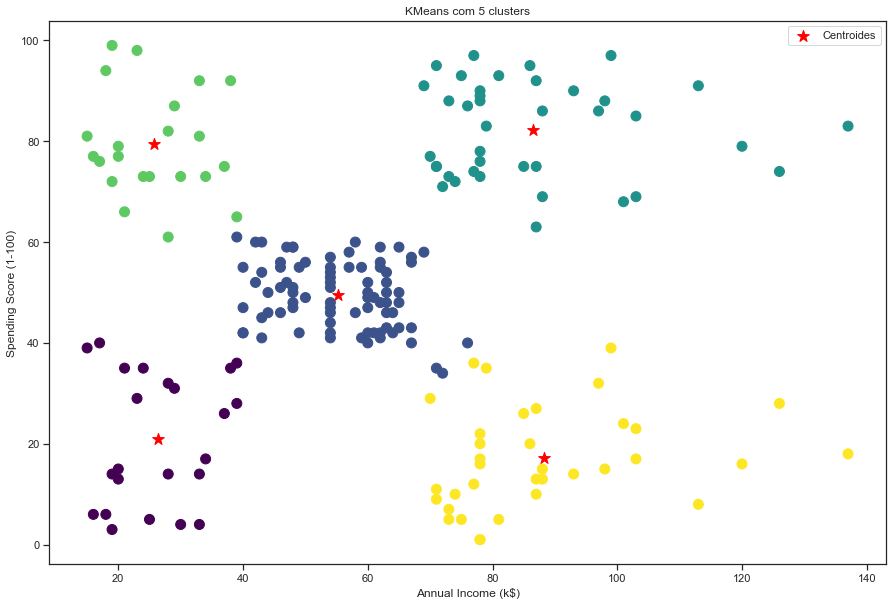

In [33]:
#   Visualização da clusterização do algoritmo KMeans utilizando o gráfico 'scatter'
#   cmap = configuração de cores automaticas do matplotlib, teste "Pastel1", "Set1", "viridis" e etc.
#   c = Y , irá variar de acordo com o agrupamento em Y
plt.scatter(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], cmap="viridis", c=Y ,s=100)

#   Visualização da localização dos centroides em vermelho
#   marker = tipo do marcador - p = pentagono, s = star
#   s = tamanho do marcador
plt.scatter(centroides[:,0], centroides[:,1], color='red', marker='*', s=150, label="Centroides") 

#   Legenda do eixo X
plt.xlabel('Annual Income (k$)')
#   Legenda do eixo Y
plt.ylabel('Spending Score (1-100)')
#   Titulo do Gráfico
plt.title('KMeans com 5 clusters')

plt.legend()

plt.show()

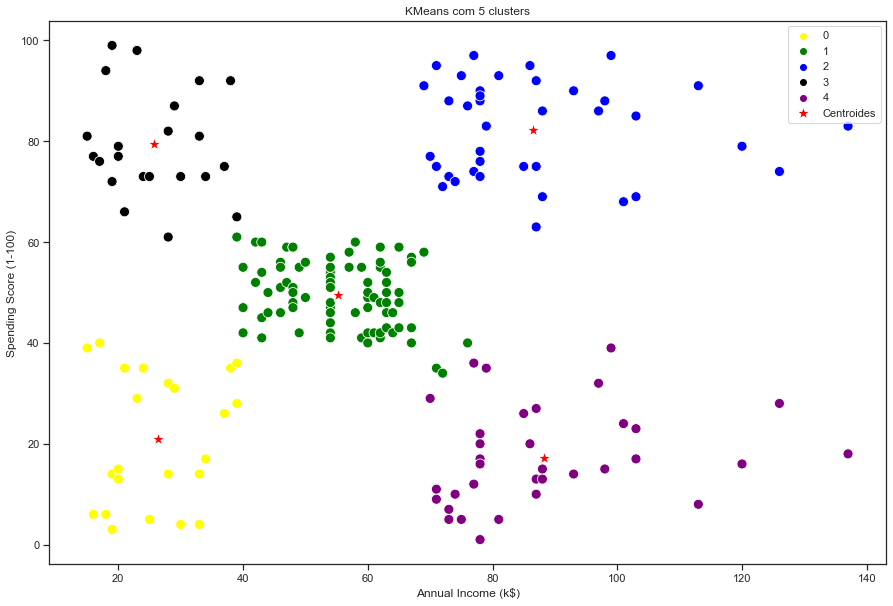

In [34]:
#   Utilizando seaborn
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'],
                data=df , hue=Y, s=100,
                palette=['yellow','green','blue','black','purple'])

sns.scatterplot(x = centroides[:,0], y= centroides[:,1], color='red', marker='*', s=200, label="Centroides")
#   Titulo do Gráfico
plt.title('KMeans com 5 clusters')
plt.show()

### Silhouette Score - Avaliando o algoritmo KMeans

A good clustering minimizes **intra-cluster distances** and maximizes **inter-cluster distances**

**intra-cluster distances** = Distancia entre centroide e a instancia(ou ponto)

**inter-cluster distances** = Distancia entre os centroides

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. 
+   Its value ranges from -1 to 1.
    -   1: Means clusters are well apart from each other and clearly distinguished.
    -   0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    -   -1: Means clusters are assigned in the wrong way.
    
$$ Silhouette Score = (b-a)/max(a,b) $$
where

a = average intra-cluster distance i.e the average distance between each point within a cluster.

b = average inter-cluster distance i.e the average distance between all clusters.

In [35]:
#   Importando a função 'silhouette_score' da biblioteca sklearn
from sklearn.metrics import silhouette_score
#   Criação da variável 'score' que recebe a função silhouette score
score = silhouette_score(X, Y)
print(f'Silhouette Score (n=5): {score}')

Silhouette Score (n=5): 0.553931997444648


In [36]:
#   Importando a função 'silhouette_samples' da biblioteca sklearn
from sklearn.metrics import silhouette_samples
#   Criação da variável 'score' que recebe a função silhouette sample
#   que verifica o score de cada registro do algoritmo KMeans
score2 = silhouette_samples(X, Y, metric='euclidean')
print("score e:", score2)

score e: [ 0.41700493  0.69637752  0.6399526   0.6964831   0.39230007  0.6981303
  0.64910316  0.65972193  0.63021343  0.66350398  0.67788678  0.62355268
  0.68003912  0.71908624  0.68070792  0.72573786  0.48557434  0.54505971
  0.58062414  0.631684    0.46597803  0.6774284   0.64167396  0.67170097
  0.66126882  0.70488566  0.48931822  0.30121073  0.49570828  0.6847372
  0.60630845  0.612474    0.57697817  0.61775968  0.60922585  0.63936997
  0.58581667  0.52897452  0.42116018  0.48378692  0.09342298  0.54589636
 -0.00927769  0.1170758   0.31116673  0.0507214   0.38841392  0.43312564
  0.29204034  0.29204034  0.5203998   0.30155503  0.51561237  0.34144075
  0.48988757  0.37332421  0.59860522  0.54128572  0.63883859  0.59367906
  0.55806656  0.57952023  0.64920886  0.50415514  0.67809813  0.52881485
  0.68358333  0.66547762  0.52881485  0.65267375  0.64243997  0.57400953
  0.70652524  0.64014053  0.73196104  0.71947278  0.73150424  0.74072908
  0.74112697  0.65442117  0.74842791  0.7049

###     Link Scikit learn to plot silhouette score

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#:~:text=The%20silhouette%20plot%20for%20cluster%200%20when%20n_clusters,from%20the%20labelled%20scatter%20plot%20on%20the%20right.

###  Interpretation of results

The fundamental question is how do the members of a particular cluster differ from the overall population?

*what makes the members of this cluster special?*

The **first** thing that should always be done is a careful examination of a set of summary statistics describing the members of each cluster. This can be done by preparing a **data quality report** for each cluster that describes the instances that belong to that cluster.

The **second** thing is to prepare a series of data visualizations that examine the distribution of each feature for the members of each cluster found.

The **final** thing is to rank the importance of each descriptive feature in defining membership of each cluster. This can be done by calculating the **information gain** for each descriptive feature as a predictor of binary flags indicating membership of each cluster and ranking features according to these information gain values

###  Challenging of results

A FAZER

###  Creating reproducible code

A FAZER